In [28]:
Sys.setenv(LANG = "en")


# Data processing library
library(data.table)       # Data manipulation
library(plyr)             # Data manipulation
library(stringr)          # String, text processing
library(vita)             # Quickly check variable importance
library(dataPreparation)  # Data preparation library
library(woeBinning)       # Decision tree–based binning for numerical and categorical variables
library(Boruta)           # Variable selection
library(ggplot2)     # Visualization
library(pROC)        # AUC, ROC
library(e1071)       # SVM
library(repr)

# Machine learning library
library(mlr)          # Machine learning framework
library(caret)         # Data processing and machine learning framework
library(MASS)          # LDA
library(randomForest)  # RF
library(gbm)           # Boosting Tree
library(xgboost)       # XGboost
library(kknn)          #KNN
library(party)
library(grid)
library(mvtnorm)
library(modeltools)
library(stats4)
library(strucchange)
library(zoo)

In [29]:
options(warn=-1)

In [30]:
train_processed <- read.csv('C:/Users/lenovo/Desktop/kaggle_data/train_processed.csv') 
valid_processed <- read.csv('C:/Users/lenovo/Desktop/kaggle_data/valid_processed.csv') 
test_processed <- read.csv('C:/Users/lenovo/Desktop/kaggle_data/test_processed.csv') 
test_holdout_processed <- read.csv('C:/Users/lenovo/Desktop/kaggle_data/test_holdout_processed.csv') 
test_holdout <- read.csv('C:/Users/lenovo/Desktop/kaggle_data/test_holdout.csv') 

In [31]:
head(train_processed)

X client_id pdays emp_var_rate euribor3m nr_employed pdays_999
1 1  2        999    1.1         4.858     5191.0      1        
2 2  5        999   -1.8         1.299     5099.1      1        
3 3  8        999   -0.1         4.153     5195.8      1        
4 4 21        999    1.4         4.967     5228.1      1        
5 5 22        999    1.4         4.964     5228.1      1        
6 6 24        999    1.4         4.964     5228.1      1        
  woe_month_binned woe_emp_var_rate_binned woe_cons_price_idx_binned ...
1 -33.39693        -94.56851               -123.93836                ...
2 -33.39693         44.14570                 30.17728                ...
3 -33.39693         44.14570                -33.24684                ...
4 -33.39693        -94.56851                -33.24684                ...
5 -33.39693        -94.56851                -33.24684                ...
6 -33.39693        -94.56851                -33.24684                ...
  euribor3m_binned_woe nr_employed_binned_woe emp_var_rate_freq_bin_woe
1 -2.616464            -2.896025              -3.289431                
2 -2.616464            -1.971674              -1.429056                
3 -2.616464            -2.896025              -2.363994                
4 -2.616464            -2.896025              -2.876386                
5 -2.616464            -2.896025              -2.876386                
6 -2.616464            -2.896025              -2.876386                
  euribor3m_freq_bin_woe nr_employed_freq_bin_woe emp_var_rate_width_bin_woe
1 -3.192275              -3.289431                -2.995732                 
2 -2.098587              -1.974348                -1.540039                 
3 -2.098587              -2.363994                -2.370244                 
4 -2.833213              -2.876386                -2.995732                 
5 -2.833213              -2.876386                -2.995732                 
6 -2.833213              -2.876386                -2.995732                 
  cons_conf_idx_width_bin_woe euribor3m_width_bin_woe nr_employed_width_bin_woe
1 -2.671493                   -2.929108               -2.896025                
2 -1.876394                   -1.171029               -1.691018                
3 -2.756119                   -2.639057               -2.896025                
4 -2.671493                   -2.929108               -2.896025                
5 -2.671493                   -2.929108               -2.896025                
6 -2.671493                   -2.929108               -2.896025                
  subscribe
1 0        
2 0        
3 0        
4 0        
5 1        
6 0

In [32]:
str(train_processed)
summary(train_processed)

'data.frame':	4200 obs. of  53 variables:
 $ X                                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ client_id                         : int  2 5 8 21 22 24 26 29 34 39 ...
 $ pdays                             : int  999 999 999 999 999 999 999 999 999 999 ...
 $ emp_var_rate                      : num  1.1 -1.8 -0.1 1.4 1.4 1.4 1.4 1.4 1.4 1.1 ...
 $ euribor3m                         : num  4.86 1.3 4.15 4.97 4.96 ...
 $ nr_employed                       : num  5191 5099 5196 5228 5228 ...
 $ pdays_999                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ woe_month_binned                  : num  -33.4 -33.4 -33.4 -33.4 -33.4 ...
 $ woe_emp_var_rate_binned           : num  -94.6 44.1 44.1 -94.6 -94.6 ...
 $ woe_cons_price_idx_binned         : num  -123.9 30.2 -33.2 -33.2 -33.2 ...
 $ woe_cons_conf_idx_binned          : num  9.41 -59.01 -59.01 -106.55 -106.55 ...
 $ woe_euribor3m_binned              : num  -56.6 -56.6 -56.6 -56.6 -56.6 ...
 $ woe_nr_employed_binned     

       X          client_id        pdays        emp_var_rate     
 Min.   :   1   Min.   :   2   Min.   :  0.0   Min.   :-3.40000  
 1st Qu.:1051   1st Qu.:2454   1st Qu.:999.0   1st Qu.:-1.80000  
 Median :2100   Median :4992   Median :999.0   Median : 1.10000  
 Mean   :2100   Mean   :5000   Mean   :964.3   Mean   : 0.06726  
 3rd Qu.:3150   3rd Qu.:7548   3rd Qu.:999.0   3rd Qu.: 1.40000  
 Max.   :4200   Max.   :9998   Max.   :999.0   Max.   : 1.40000  
   euribor3m      nr_employed     pdays_999     woe_month_binned
 Min.   :0.634   Min.   :4964   Min.   :0.000   Min.   :-33.40  
 1st Qu.:1.344   1st Qu.:5099   1st Qu.:1.000   1st Qu.:-33.40  
 Median :4.857   Median :5191   Median :1.000   Median :-33.40  
 Mean   :3.609   Mean   :5166   Mean   :0.965   Mean   :-13.89  
 3rd Qu.:4.961   3rd Qu.:5228   3rd Qu.:1.000   3rd Qu.:-33.40  
 Max.   :5.045   Max.   :5228   Max.   :1.000   Max.   :195.00  
 woe_emp_var_rate_binned woe_cons_price_idx_binned woe_cons_conf_idx_binned
 Min.  

## Feature Selection 

In [33]:
##drop columns x and client id##
train_processed <- subset(train_processed, select = -c(X, client_id))
valid_processed <- subset(valid_processed, select = -c(X, client_id))
test_processed <- subset(test_processed, select = -c(X, client_id))

In [34]:
library('randomForest')
# Using random forest for variable selection
rfModelSelect <-randomForest(subscribe ~ ., data = train_processed)

In [35]:
# Getting the list of important variables
varImportance = importance(rfModelSelect)

In [36]:
varImportance

IncNodePurity
pdays                               8.20774683  
emp_var_rate                        1.07094762  
euribor3m                          28.39120896  
nr_employed                         2.96443197  
pdays_999                           2.75028735  
woe_month_binned                    1.18529944  
woe_emp_var_rate_binned             0.06972374  
woe_cons_price_idx_binned           0.54195190  
woe_cons_conf_idx_binned            0.59701671  
woe_euribor3m_binned                0.44854962  
woe_nr_employed_binned              5.90394176  
month_binned_nov_aug_jul_jun_may    1.68281852  
month_binned_misc_levelpos_         1.15219465  
emp_var_rate_binned___0_1_Inf_      0.01922046  
cons_conf_idx_binned___36_1_Inf_    0.13974626  
euribor3m_binned___Inf_1_264_       0.64262742  
euribor3m_binned__1_264_Inf_        0.47562237  
nr_employed_binned___Inf_5076_2_    2.70766451  
nr_employed_binned__5099_1_Inf_     0.03707419  
pdays_freq_bin__999__Inf_           3.71799861  
pdays_width_bin__0_199_8_           3.99971067  
euribor3m_width_bin__0_634_1_5162_  0.14210104  
month_incidence                     3.14959196  
month_binned_incidence              1.44780714  
emp_var_rate_binned_incidence       0.11953753  
cons_price_idx_binned_incidence     0.50351024  
cons_conf_idx_binned_incidence      0.65256874  
euribor3m_binned_incidence          0.45215938  
nr_employed_binned_incidence        5.30003623  
emp_var_rate_freq_bin_incidence     0.25034881  
euribor3m_freq_bin_incidence        0.58617533  
nr_employed_freq_bin_incidence     14.17101534  
emp_var_rate_width_bin_incidence    0.34212289  
cons_conf_idx_width_bin_incidence   1.64802261  
euribor3m_width_bin_incidence       0.31460607  
nr_employed_width_bin_incidence     1.66553405  
month_woe                           3.03144426  
month_binned_woe                    1.36593733  
emp_var_rate_binned_woe             0.12389010  
cons_price_idx_binned_woe           0.51933858  
cons_conf_idx_binned_woe            0.65752146  
euribor3m_binned_woe                0.53883172  
nr_employed_binned_woe              6.30575146  
emp_var_rate_freq_bin_woe           0.23713004  
euribor3m_freq_bin_woe              0.68145707  
nr_employed_freq_bin_woe           16.95722110  
emp_var_rate_width_bin_woe          0.31327184  
cons_conf_idx_width_bin_woe         1.35066151  
euribor3m_width_bin_woe             0.26400410  
nr_employed_width_bin_woe           1.24330185

In [37]:
str(varImportance)

 num [1:50, 1] 8.21 1.07 28.39 2.96 2.75 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:50] "pdays" "emp_var_rate" "euribor3m" "nr_employed" ...
  ..$ : chr "IncNodePurity"


In [38]:
varImportance[order(varImportance,decreasing = TRUE )]

[1] 28.39120896 16.95722110 14.17101534  8.20774683  6.30575146  5.90394176
 [7]  5.30003623  3.99971067  3.71799861  3.14959196  3.03144426  2.96443197
[13]  2.75028735  2.70766451  1.68281852  1.66553405  1.64802261  1.44780714
[19]  1.36593733  1.35066151  1.24330185  1.18529944  1.15219465  1.07094762
[25]  0.68145707  0.65752146  0.65256874  0.64262742  0.59701671  0.58617533
[31]  0.54195190  0.53883172  0.51933858  0.50351024  0.47562237  0.45215938
[37]  0.44854962  0.34212289  0.31460607  0.31327184  0.26400410  0.25034881
[43]  0.23713004  0.14210104  0.13974626  0.12389010  0.11953753  0.06972374
[49]  0.03707419  0.01922046

In [39]:
###Get the selected features###
selectedFeature = rownames(varImportance)[order(varImportance,decreasing = TRUE )][1:10]

In [40]:
selectedFeature = c(selectedFeature, "subscribe")
selectedFeature

[1] "euribor3m"                      "nr_employed_freq_bin_woe"      
 [3] "nr_employed_freq_bin_incidence" "pdays"                         
 [5] "nr_employed_binned_woe"         "woe_nr_employed_binned"        
 [7] "nr_employed_binned_incidence"   "pdays_width_bin__0_199_8_"     
 [9] "pdays_freq_bin__999__Inf_"      "month_incidence"               
[11] "subscribe"

In [41]:
###Use Selected features
train_processed = train_processed[selectedFeature]
valid_processed = valid_processed[selectedFeature]
test_processed = test_processed[selectedFeature]

# Unbalanced Data

In [42]:
sum(train_processed$subscribe) / length(train_processed$subscribe)

[1] 0.1140476

In [43]:
##because is unbalanced data, we should use sampling method, smote in the following params

# K-Flod Cross-validation

### Linear Regression### 

In [44]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "repeatedcv", 
                              number = 10, repeats = 3, sampling="up")
# Train the model
model <- train(factor(subscribe) ~., data = train_processed, method = "glm",
               trControl = train.control, family=binomial)
# Summarize the results
print(model)

Generalized Linear Model 

4200 samples
  10 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 3780, 3780, 3780, 3780, 3780, 3780, ... 
Addtional sampling using up-sampling

Resampling results:

  Accuracy   Kappa    
  0.8209551  0.3475942



In [45]:
###validation auc###
pred_validate = predict(model, valid_processed, type="prob")[2][["1"]]
roc_lm <- roc(valid_processed$subscribe, pred_validate)
auc(roc_lm)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8129

In [46]:
pred_validate_class = predict(model, valid_processed)
xtab <- table(pred_validate_class, valid_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

                   
pred_validate_class    0    1
                  0 1080   56
                  1  167   97
                                          
               Accuracy : 0.8407          
                 95% CI : (0.8205, 0.8595)
    No Information Rate : 0.8907          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3793          
                                          
 Mcnemar's Test P-Value : 1.756e-13       
                                          
            Sensitivity : 0.8661          
            Specificity : 0.6340          
         Pos Pred Value : 0.9507          
         Neg Pred Value : 0.3674          
             Prevalence : 0.8907          
         Detection Rate : 0.7714          
   Detection Prevalence : 0.8114          
      Balanced Accuracy : 0.7500          
                                          
       'Positive' Class : 0             

In [47]:
###test auc###
pred_test = predict(model, test_processed, type="prob")[2][["1"]]
roc_lm <- roc(test_processed$subscribe, pred_test)
auc(roc_lm)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8032

In [48]:
pred_test_class = predict(model, test_processed)
xtab <- table(pred_test_class, test_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

               
pred_test_class    0    1
              0 1046   68
              1  164  122
                                          
               Accuracy : 0.8343          
                 95% CI : (0.8138, 0.8534)
    No Information Rate : 0.8643          
    P-Value [Acc > NIR] : 0.9994          
                                          
                  Kappa : 0.4176          
                                          
 Mcnemar's Test P-Value : 4.459e-10       
                                          
            Sensitivity : 0.8645          
            Specificity : 0.6421          
         Pos Pred Value : 0.9390          
         Neg Pred Value : 0.4266          
             Prevalence : 0.8643          
         Detection Rate : 0.7471          
   Detection Prevalence : 0.7957          
      Balanced Accuracy : 0.7533          
                                          
       'Positive' Class : 0               
             

# Random Forest

In [49]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "repeatedcv", 
                              number = 5, repeats = 2, sampling="up")
# Train the model
model <- train(factor(subscribe) ~., data = train_processed, method = "rf",
               trControl = train.control, family=binomial)
# Summarize the results
print(model)

Random Forest 

4200 samples
  10 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 2 times) 
Summary of sample sizes: 3360, 3360, 3359, 3360, 3361, 3360, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8215475  0.3468150
   6    0.8407141  0.3582806
  10    0.8347654  0.2836629

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 6.


In [50]:
###validation auc###
pred_validate = predict(model, valid_processed, type="prob")[2][["1"]]
roc_rf <- roc(valid_processed$subscribe, pred_validate)
auc(roc_rf)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7926

In [51]:
##accuarcy // confusion matrix
pred_validate_class = predict(model, valid_processed)
xtab <- table(pred_validate_class, valid_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

                   
pred_validate_class    0    1
                  0 1108   58
                  1  139   95
                                        
               Accuracy : 0.8593        
                 95% CI : (0.84, 0.8771)
    No Information Rate : 0.8907        
    P-Value [Acc > NIR] : 0.9999        
                                        
                  Kappa : 0.4134        
                                        
 Mcnemar's Test P-Value : 1.2e-08       
                                        
            Sensitivity : 0.8885        
            Specificity : 0.6209        
         Pos Pred Value : 0.9503        
         Neg Pred Value : 0.4060        
             Prevalence : 0.8907        
         Detection Rate : 0.7914        
   Detection Prevalence : 0.8329        
      Balanced Accuracy : 0.7547        
                                        
       'Positive' Class : 0             
                                     

In [52]:
###test auc###
pred_test = predict(model, test_processed, type="prob")[2][["1"]]
roc_rf <- roc(test_processed$subscribe, pred_test)
auc(roc_rf)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7703

In [53]:
##accuarcy // confusion matrix
pred_test_class = predict(model, test_processed)
xtab <- table(pred_test_class, test_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

               
pred_test_class    0    1
              0 1076   78
              1  134  112
                                         
               Accuracy : 0.8486         
                 95% CI : (0.8287, 0.867)
    No Information Rate : 0.8643         
    P-Value [Acc > NIR] : 0.9588303      
                                         
                  Kappa : 0.4258         
                                         
 Mcnemar's Test P-Value : 0.0001585      
                                         
            Sensitivity : 0.8893         
            Specificity : 0.5895         
         Pos Pred Value : 0.9324         
         Neg Pred Value : 0.4553         
             Prevalence : 0.8643         
         Detection Rate : 0.7686         
   Detection Prevalence : 0.8243         
      Balanced Accuracy : 0.7394         
                                         
       'Positive' Class : 0              
                                 

# SVM

In [67]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "repeatedcv", 
                              number = 5, repeats = 2, sampling="up")
# Train the model
model <- train(factor(subscribe) ~., data = train_processed, method = "lssvmLinear",
               trControl = train.control, family=binomial)
# Summarize the results
print(model)

1 package is needed for this model and is not installed. (kernlab). Would you like to try to install it now?

ERROR: Error: Required package is missing


In [68]:
##accuarcy // confusion matrix
pred_validate_class = predict(model, valid_processed)
xtab <- table(pred_validate_class, valid_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

                   
pred_validate_class    0    1
                  0 1080   56
                  1  167   97
                                          
               Accuracy : 0.8407          
                 95% CI : (0.8205, 0.8595)
    No Information Rate : 0.8907          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3793          
                                          
 Mcnemar's Test P-Value : 1.756e-13       
                                          
            Sensitivity : 0.8661          
            Specificity : 0.6340          
         Pos Pred Value : 0.9507          
         Neg Pred Value : 0.3674          
             Prevalence : 0.8907          
         Detection Rate : 0.7714          
   Detection Prevalence : 0.8114          
      Balanced Accuracy : 0.7500          
                                          
       'Positive' Class : 0             

In [69]:
##accuarcy // confusion matrix
pred_test_class = predict(model, test_processed)
xtab <- table(pred_test_class, test_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

               
pred_test_class    0    1
              0 1046   68
              1  164  122
                                          
               Accuracy : 0.8343          
                 95% CI : (0.8138, 0.8534)
    No Information Rate : 0.8643          
    P-Value [Acc > NIR] : 0.9994          
                                          
                  Kappa : 0.4176          
                                          
 Mcnemar's Test P-Value : 4.459e-10       
                                          
            Sensitivity : 0.8645          
            Specificity : 0.6421          
         Pos Pred Value : 0.9390          
         Neg Pred Value : 0.4266          
             Prevalence : 0.8643          
         Detection Rate : 0.7471          
   Detection Prevalence : 0.7957          
      Balanced Accuracy : 0.7533          
                                          
       'Positive' Class : 0               
             

# KNN

In [57]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "repeatedcv", 
                              number = 5, repeats = 2, sampling="up")
# Train the model
model <- train(factor(subscribe) ~., data = train_processed, method = "kknn",
               trControl = train.control, family=binomial)
# Summarize the results
print(model)

k-Nearest Neighbors 

4200 samples
  10 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 2 times) 
Summary of sample sizes: 3360, 3360, 3359, 3360, 3361, 3360, ... 
Addtional sampling using up-sampling

Resampling results across tuning parameters:

  kmax  Accuracy  Kappa    
  5     0.884404  0.2931189
  7     0.884166  0.3036026
  9     0.884166  0.3019053

Tuning parameter 'distance' was held constant at a value of 2
Tuning
 parameter 'kernel' was held constant at a value of optimal
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were kmax = 5, distance = 2 and kernel
 = optimal.


In [58]:
###validation auc###
pred_validate = predict(model, valid_processed, type="prob")[2][["1"]]
roc_knn <- roc(valid_processed$subscribe, pred_validate)
auc(roc_knn)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7175

In [59]:
##accuarcy // confusion matrix
pred_validate_class = predict(model, valid_processed)
xtab <- table(pred_validate_class, valid_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

                   
pred_validate_class    0    1
                  0 1199   96
                  1   48   57
                                        
               Accuracy : 0.8971        
                 95% CI : (0.88, 0.9126)
    No Information Rate : 0.8907        
    P-Value [Acc > NIR] : 0.2349        
                                        
                  Kappa : 0.3874        
                                        
 Mcnemar's Test P-Value : 8.978e-05     
                                        
            Sensitivity : 0.9615        
            Specificity : 0.3725        
         Pos Pred Value : 0.9259        
         Neg Pred Value : 0.5429        
             Prevalence : 0.8907        
         Detection Rate : 0.8564        
   Detection Prevalence : 0.9250        
      Balanced Accuracy : 0.6670        
                                        
       'Positive' Class : 0             
                                     

In [60]:
###test auc###
pred_test = predict(model, test_processed, type="prob")[2][["1"]]
roc_knn <- roc(test_processed$subscribe, pred_test)
auc(roc_knn)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.7009

In [61]:
##accuarcy // confusion matrix
pred_test_class = predict(model, test_processed)
xtab <- table(pred_test_class, test_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

               
pred_test_class    0    1
              0 1170  125
              1   40   65
                                          
               Accuracy : 0.8821          
                 95% CI : (0.8641, 0.8986)
    No Information Rate : 0.8643          
    P-Value [Acc > NIR] : 0.02626         
                                          
                  Kappa : 0.3809          
                                          
 Mcnemar's Test P-Value : 6.177e-11       
                                          
            Sensitivity : 0.9669          
            Specificity : 0.3421          
         Pos Pred Value : 0.9035          
         Neg Pred Value : 0.6190          
             Prevalence : 0.8643          
         Detection Rate : 0.8357          
   Detection Prevalence : 0.9250          
      Balanced Accuracy : 0.6545          
                                          
       'Positive' Class : 0               
             

# LDA

In [70]:
# Define training control
set.seed(123) 
train.control <- trainControl(method = "repeatedcv", 
                              number = 5, repeats = 2, sampling="up")
# Train the model
model <- train(factor(subscribe) ~., data = train_processed, method = "lda",
               trControl = train.control, family=binomial)
# Summarize the results
print(model)

Linear Discriminant Analysis 

4200 samples
  10 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (5 fold, repeated 2 times) 
Summary of sample sizes: 3360, 3360, 3359, 3360, 3361, 3360, ... 
Addtional sampling using up-sampling

Resampling results:

  Accuracy   Kappa    
  0.8208334  0.3472983



In [71]:
###validation auc###
pred_validate = predict(model, valid_processed, type="prob")[2][["1"]]
roc_gbm <- roc(valid_processed$subscribe, pred_validate)
auc(roc_gbm)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8113

In [72]:
##accuarcy // confusion matrix
pred_validate_class = predict(model, valid_processed)
xtab <- table(pred_validate_class, valid_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

                   
pred_validate_class    0    1
                  0 1080   56
                  1  167   97
                                          
               Accuracy : 0.8407          
                 95% CI : (0.8205, 0.8595)
    No Information Rate : 0.8907          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3793          
                                          
 Mcnemar's Test P-Value : 1.756e-13       
                                          
            Sensitivity : 0.8661          
            Specificity : 0.6340          
         Pos Pred Value : 0.9507          
         Neg Pred Value : 0.3674          
             Prevalence : 0.8907          
         Detection Rate : 0.7714          
   Detection Prevalence : 0.8114          
      Balanced Accuracy : 0.7500          
                                          
       'Positive' Class : 0             

In [73]:
###test auc###
pred_test = predict(model, test_processed, type="prob")[2][["1"]]
roc_gbm <- roc(test_processed$subscribe, pred_test)
auc(roc_gbm)

Setting levels: control = 0, case = 1
Setting direction: controls < cases


Area under the curve: 0.8024

In [66]:
##accuarcy // confusion matrix
pred_test_class = predict(model, test_processed)
xtab <- table(pred_test_class, test_processed$subscribe)
confusionMatrix(xtab)

Confusion Matrix and Statistics

               
pred_test_class    0    1
              0 1046   68
              1  164  122
                                          
               Accuracy : 0.8343          
                 95% CI : (0.8138, 0.8534)
    No Information Rate : 0.8643          
    P-Value [Acc > NIR] : 0.9994          
                                          
                  Kappa : 0.4176          
                                          
 Mcnemar's Test P-Value : 4.459e-10       
                                          
            Sensitivity : 0.8645          
            Specificity : 0.6421          
         Pos Pred Value : 0.9390          
         Neg Pred Value : 0.4266          
             Prevalence : 0.8643          
         Detection Rate : 0.7471          
   Detection Prevalence : 0.7957          
      Balanced Accuracy : 0.7533          
                                          
       'Positive' Class : 0               
             

# Desicion Tree

In [115]:
##  Create Tree
tree_model <- ctree(subscribe ~., data = train_processed)

In [117]:
##Predict Value
preTable <- table(predict(tree_model), train_processed$subscribe)
preTable

                    
                        0    1
  0.0555223880597015 3164  186
  0.190635451505017   242   57
  0.342789598108747   278  145
  0.703389830508475    35   83
  0.8                   2    8

In [94]:
##accurary----0.766904761904762
accurary <- sum(diag(preTable))/sum(preTable)
accurary

[1] 0.7669048

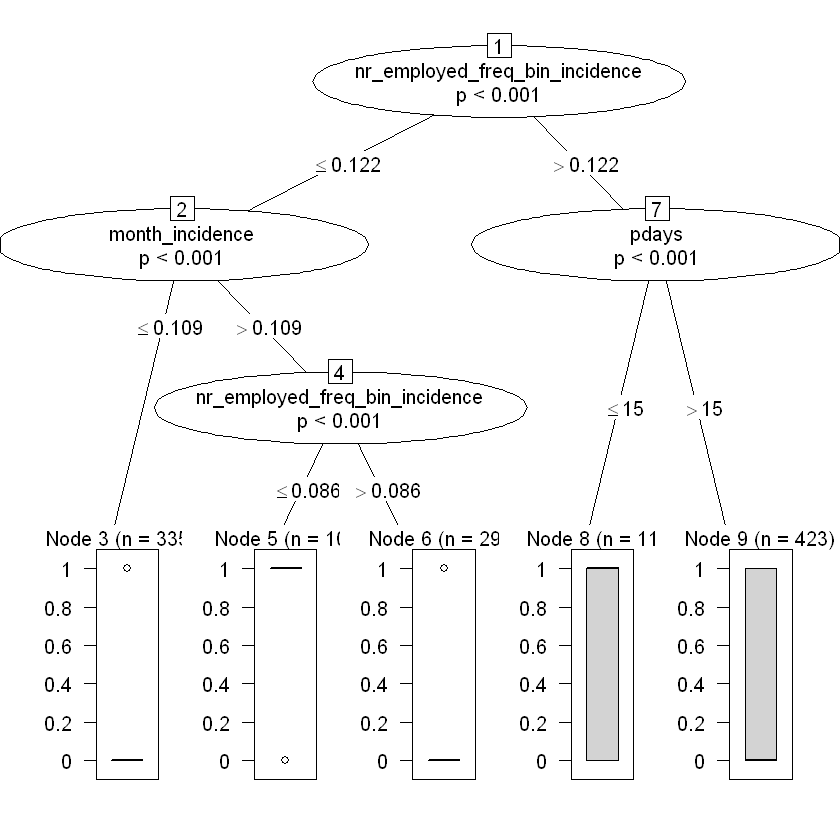

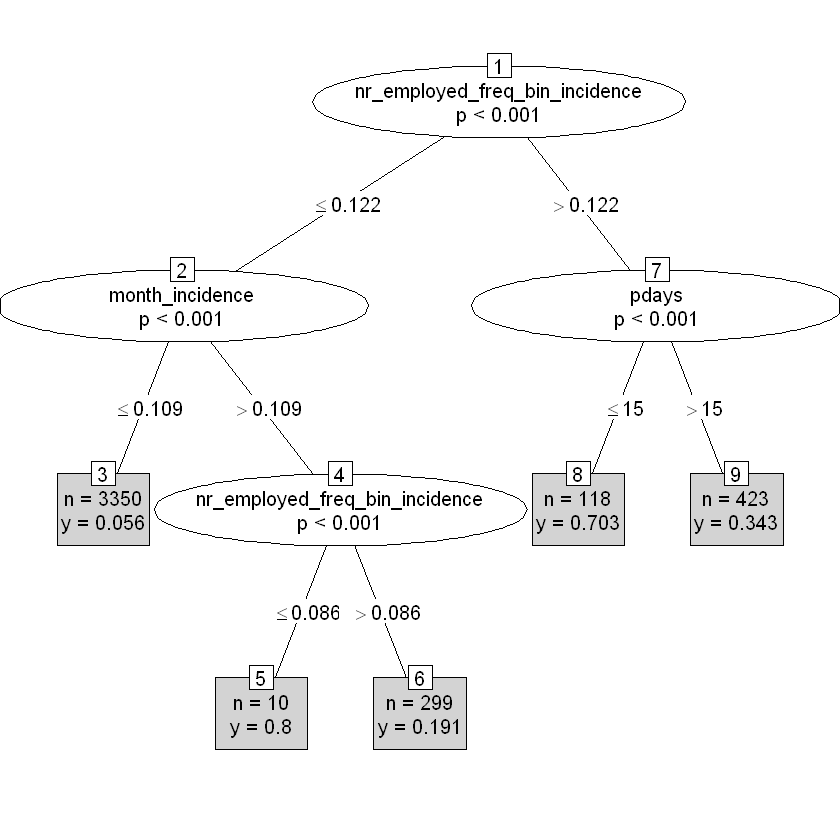

In [95]:
##Plot Tree
plot(tree_model)
plot(tree_model, type="simple")  ## simplize decision tree

# Naive Bayes

In [100]:
model_nb <- naiveBayes(subscribe ~., data =train_processed )

In [101]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=5, predict="both")

# Define the model
learner <- makeLearner("classif.naiveBayes", predict.type="prob", fix.factors.prediction=T)

# Define the task
train_task <- makeClassifTask(id="bank_train", data=train_processed[, -1], target="subscribe")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::auc))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::auc, setAggregation(mlr::auc, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Resampling: cross-validation
Measures:             auc.train   auc.test    
[Resample] iter 1:    0.7759245   0.7730877   
[Resample] iter 2:    0.7810629   0.7519125   
[Resample] iter 3:    0.7732158   0.7860224   
[Resample] iter 4:    0.7762831   0.7717806   
[Resample] iter 5:    0.7703109   0.7956709   


Aggregated Result: auc.test.mean=0.7756948,auc.train.mean=0.7753594




In [102]:
# Retrain the model with tbe best hyper-parameters
best_md <- mlr::train(best_learner, train_task)

In [103]:
# Make prediction on valid data
pred <- predict(best_md, newdata=valid_processed[, -1])
performance(pred, measures=mlr::auc)

auc 
0.8071895

In [104]:
# Make prediction on test data
pred <- predict(best_md, newdata=test_processed[, -1])
performance(pred, measures=mlr::auc)

auc 
0.8003045

In [105]:
# Make prediction on test data
pred <- predict(best_md, newdata=test_holdout_processed[, -1])
pred

Prediction: 3000 observations
predict.type: prob
threshold: 0=0.50,1=0.50
time: 0.51
        prob.0       prob.1 response
1 9.999910e-01 9.042602e-06        0
2 9.999947e-01 5.326391e-06        0
3 1.863110e-09 1.000000e+00        1
4 9.999947e-01 5.313682e-06        0
5 9.999956e-01 4.413672e-06        0
6 9.999947e-01 5.313682e-06        0
... (#rows: 3000, #cols: 3)

In [106]:
# Output predicted file
output <- data.frame(client_id=test_holdout$client_id, subscribe=pred$data$prob.1)
write.csv(output, 'C:/Users/lenovo/Desktop/kaggle_data/output_bayes.csv', row.names=FALSE)